1. Import required packages.
2. Load the data file
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [215]:
# Pre-load packages

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [217]:
listings = pd.read_csv('fortlee-properties.csv')
listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



In [120]:
# Check non-null value distribution

listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY TYPE  344 non-null    object 
 1   PRICE          344 non-null    int64  
 2   BEDS           344 non-null    int64  
 3   BATHS          344 non-null    float64
 4   SQUARE FEET    144 non-null    float64
 5   LOT SIZE       54 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 16.2+ KB


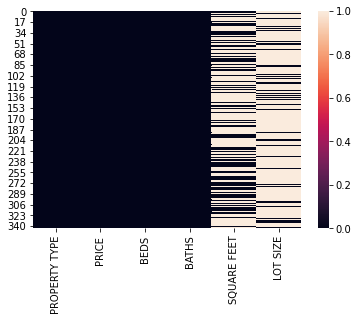

In [121]:
# Explore missing values across features

sns.heatmap(listings.isnull(), cbar=True)

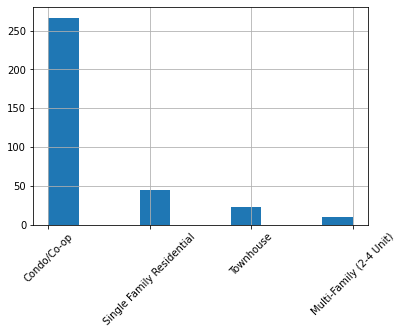

In [218]:
# Explore frequency distribution of different property types

listings['PROPERTY TYPE'].hist(xrot=45.0)

In [219]:
listings['PROPERTY TYPE'].unique()


array(['Condo/Co-op', 'Single Family Residential', 'Townhouse',
       'Multi-Family (2-4 Unit)'], dtype=object)

9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


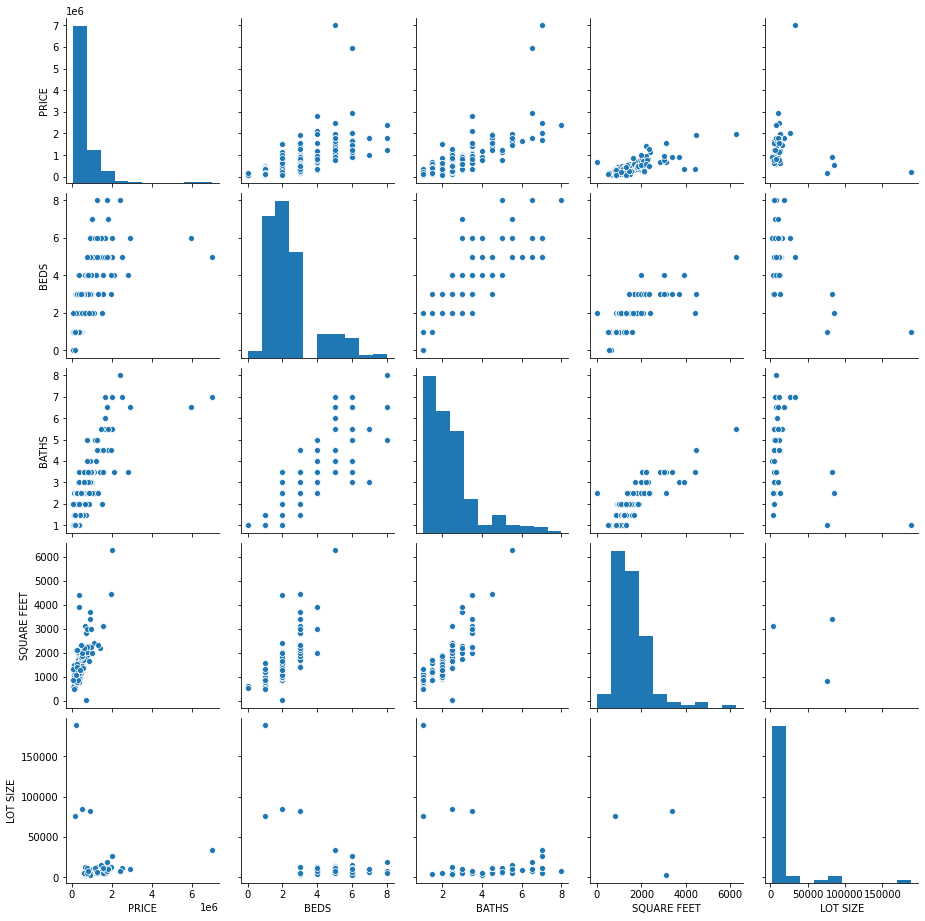

In [220]:
sns.pairplot(listings)

In [102]:
# Get summary statistics

listings.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.340000e+02,334.000000,334.000000,144.000000,46.000000
mean,5.636079e+05,2.287425,2.247006,1540.090278,17875.934783
std,6.576034e+05,1.333792,1.237395,834.065064,31928.627892
min,6.800000e+04,0.000000,1.000000,18.000000,3049.000000
25%,2.290000e+05,1.000000,1.125000,973.750000,5001.000000
50%,3.590000e+05,2.000000,2.000000,1365.500000,8860.500000
75%,6.772500e+05,3.000000,2.500000,1862.500000,12543.500000
max,7.000000e+06,8.000000,7.000000,6270.000000,188614.000000


In [221]:
# Filter out records matching criteria

listings.drop(listings[listings['SQUARE FEET'] > 2000 ].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] > 50000 ].index, inplace=True)

In [222]:
# Mean impute missing numeric values

imputed = listings.fillna(listings.mean())

In [223]:
imputed.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.120000e+02,312.000000,312.000000,312.000000,312.000000
mean,5.630030e+05,2.342949,2.238782,1233.859649,8759.387755
std,6.774401e+05,1.521871,1.324346,236.128349,2263.740775
min,6.800000e+04,0.000000,1.000000,18.000000,2500.000000
25%,2.237250e+05,1.000000,1.000000,1233.859649,8759.387755
50%,3.545000e+05,2.000000,2.000000,1233.859649,8759.387755
75%,6.636750e+05,3.000000,2.500000,1233.859649,8759.387755
max,7.000000e+06,8.000000,8.000000,2000.000000,33705.000000


In [224]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [225]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [226]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [227]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [228]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Townhouse'],
      dtype='object')

In [229]:
# Regression functional form
# Price = Intercept + b1*BEDS + b2*BATHS + b3*SqFt + b4*LotSize 

re_prices.intercept_

-892701.2633950349

In [230]:
re_prices.coef_

array([-6.46379732e+04,  3.05575011e+05, -5.09399116e+00,  9.31045353e+01,
        6.98832064e+05,  5.14984561e+05,  1.07328681e+05])

In [211]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Single Family Residential,PROPERTY TYPE_Townhouse
164,1,1.5,1233.859649,9431.585366,0,0
226,2,2.0,1233.859649,9431.585366,0,0
330,3,2.0,1233.859649,9431.585366,0,0
312,2,2.0,1233.859649,9431.585366,0,0
22,1,1.0,1062.000000,9431.585366,0,0


In [231]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score 

In [232]:
pred_y = re_prices.predict(valid_X)

In [233]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.6540378374979445
MAE:  157856.59030487988
RMSE:  302104.7969248088
Max error:  1965158.4807098436


The r-squared for this model is positive and between 0 and 1, but the errors made are more than half of the actual pricing values. 

The mean absolute of error of this model is about 157,000, meaning that this model is over predicting the asking price. 

The root mean square error of this model is almost double than the mean absolute of error, which entails that the model has substainial records to create acurrate predictions. 

The max error of this model is almost $1.9 million dollars, which further indicates that this model does not perform well. 